In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # Chart Plotting
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**IMPORTING DATASET**

In [2]:
data_set=pd.read_csv('/content/drive/My Drive/Colab-Notebooks/Mahadi/hydraulic_press_data_for_analysis.csv')
#data_set = pd.read_csv("C:\\Users\\user\\Desktop\\hydraulic_press_data_for_analysis.csv")

In [4]:
data_set.head(1000)

,Seriel Number,Equipment,Temperature,Vibraton,Usage Hour,Outcome
0,1,Hydraulic Press,48.33,0.61,45.18,Operational
1,2,Hydraulic Press,52.98,0.63,42.99,Operational
2,3,Hydraulic Press,53.96,0.64,44.47,Operational
3,4,Hydraulic Press,54.28,1.97,58.41,Bearing Fault
4,5,Hydraulic Press,54.51,2.52,56.19,Bearing Fault
...,...,...,...,...,...,...
995,996,Hydraulic Press,49.49,2.08,42.47,Bearing Fault
996,997,Hydraulic Press,49.64,2.02,53.97,Bearing Fault
997,998,Hydraulic Press,49.80,2.14,54.76,Bearing Fault
998,999,Hydraulic Press,51.18,2.12,44.17,Bearing Fault


In [5]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Seriel Number  1000 non-null   int64  
 1   Equipment      1000 non-null   object 
 2   Temperature    1000 non-null   float64
 3   Vibraton       1000 non-null   float64
 4   Usage Hour     1000 non-null   float64
 5   Outcome        1000 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 47.0+ KB


In [6]:
data_set.shape

(1000, 6)

In [7]:
print ("Numbers of rows", data_set.shape[0])
print ("Numbers of columns", data_set.shape[1])

Numbers of rows 1000
Numbers of columns 6


In [8]:
data_set.describe()

,Seriel Number,Temperature,Vibraton,Usage Hour
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,46.463740,0.862000,47.29253
std,288.819436,8.424205,0.515249,7.18292
min,1.000000,30.530000,0.510000,35.02000
25%,250.750000,39.580000,0.570000,41.09750
50%,500.500000,46.645000,0.620000,47.34000
75%,750.250000,53.560000,0.730000,53.59250
max,1000.000000,61.290000,2.550000,59.99000


In [9]:
data_set.describe().sum()

,0
Seriel Number,4291.819436
Temperature,1286.492945
Vibraton,1006.357249
Usage Hour,1291.515450


**Chart for Target**

Text(0, 0.5, 'frequency')

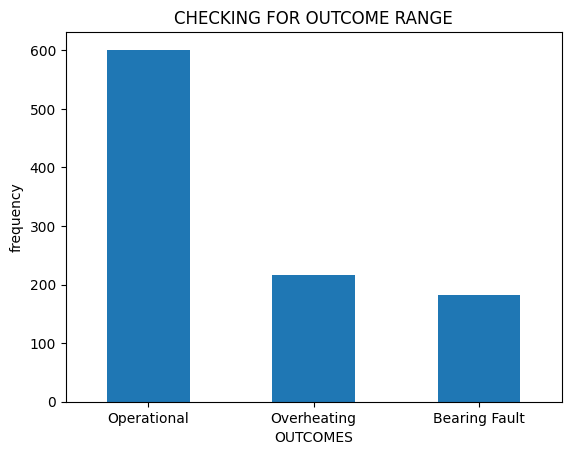

In [10]:
count_classes = pd.Series(data_set['Outcome']).value_counts()
count_classes.plot(kind='bar', rot=0)
plt.title("CHECKING FOR OUTCOME RANGE")
plt.xlabel("OUTCOMES")
plt.ylabel("frequency")

**DATA PREPROCESSING FOR MODEL TRAINING AND IMPLEMENTATION**

In [11]:
data_set.columns

Index(['Seriel Number', 'Equipment', 'Temperature', 'Vibraton', 'Usage Hour',
       'Outcome'],
      dtype='object')

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_set = pd.read_csv('/content/drive/My Drive/Colab-Notebooks/Mahadi/hydraulicPressData.csv')

# Delete the useless columns:
cols_to_drop = ['Seriel Number', 'Equipment']
data_set = data_set.drop(columns=cols_to_drop)

# Replace the value repeated if there is in the dataset: e.g.
columns = ["Outcome"]
for col in columns:
    data_set[col] = data_set[col].astype('category')
    data_set[col] = data_set[col].cat.codes

# Delete all the duplicated rows:
data_set.drop_duplicates(keep='last')

# Save the new datasets into a new csv file:
data_set.to_csv('/content/drive/My Drive/Colab-Notebooks/Mahadi/PreprocessedHydrolicDataSet.csv')

In [13]:
# Take a look at the data after processing
data_sets = pd.read_csv('/content/drive/My Drive/Colab-Notebooks/Mahadi/PreprocessedHydrolicDataSet.csv')
data_sets.head(10)

,Unnamed: 0,Temperature,Vibraton,Usage,Outcome
0,0,48.33,0.61,45.18,1
1,1,52.98,0.63,42.99,1
2,2,53.96,0.64,44.47,1
3,3,54.28,1.97,58.41,0
4,4,54.51,2.52,56.19,0
5,5,54.84,1.85,40.47,0
6,6,56.69,0.60,58.92,2
7,7,56.45,0.59,52.02,2
8,8,57.42,0.59,57.29,2
9,9,57.54,0.66,37.44,2


**CHEACKING THE DATASET CORRELATION**

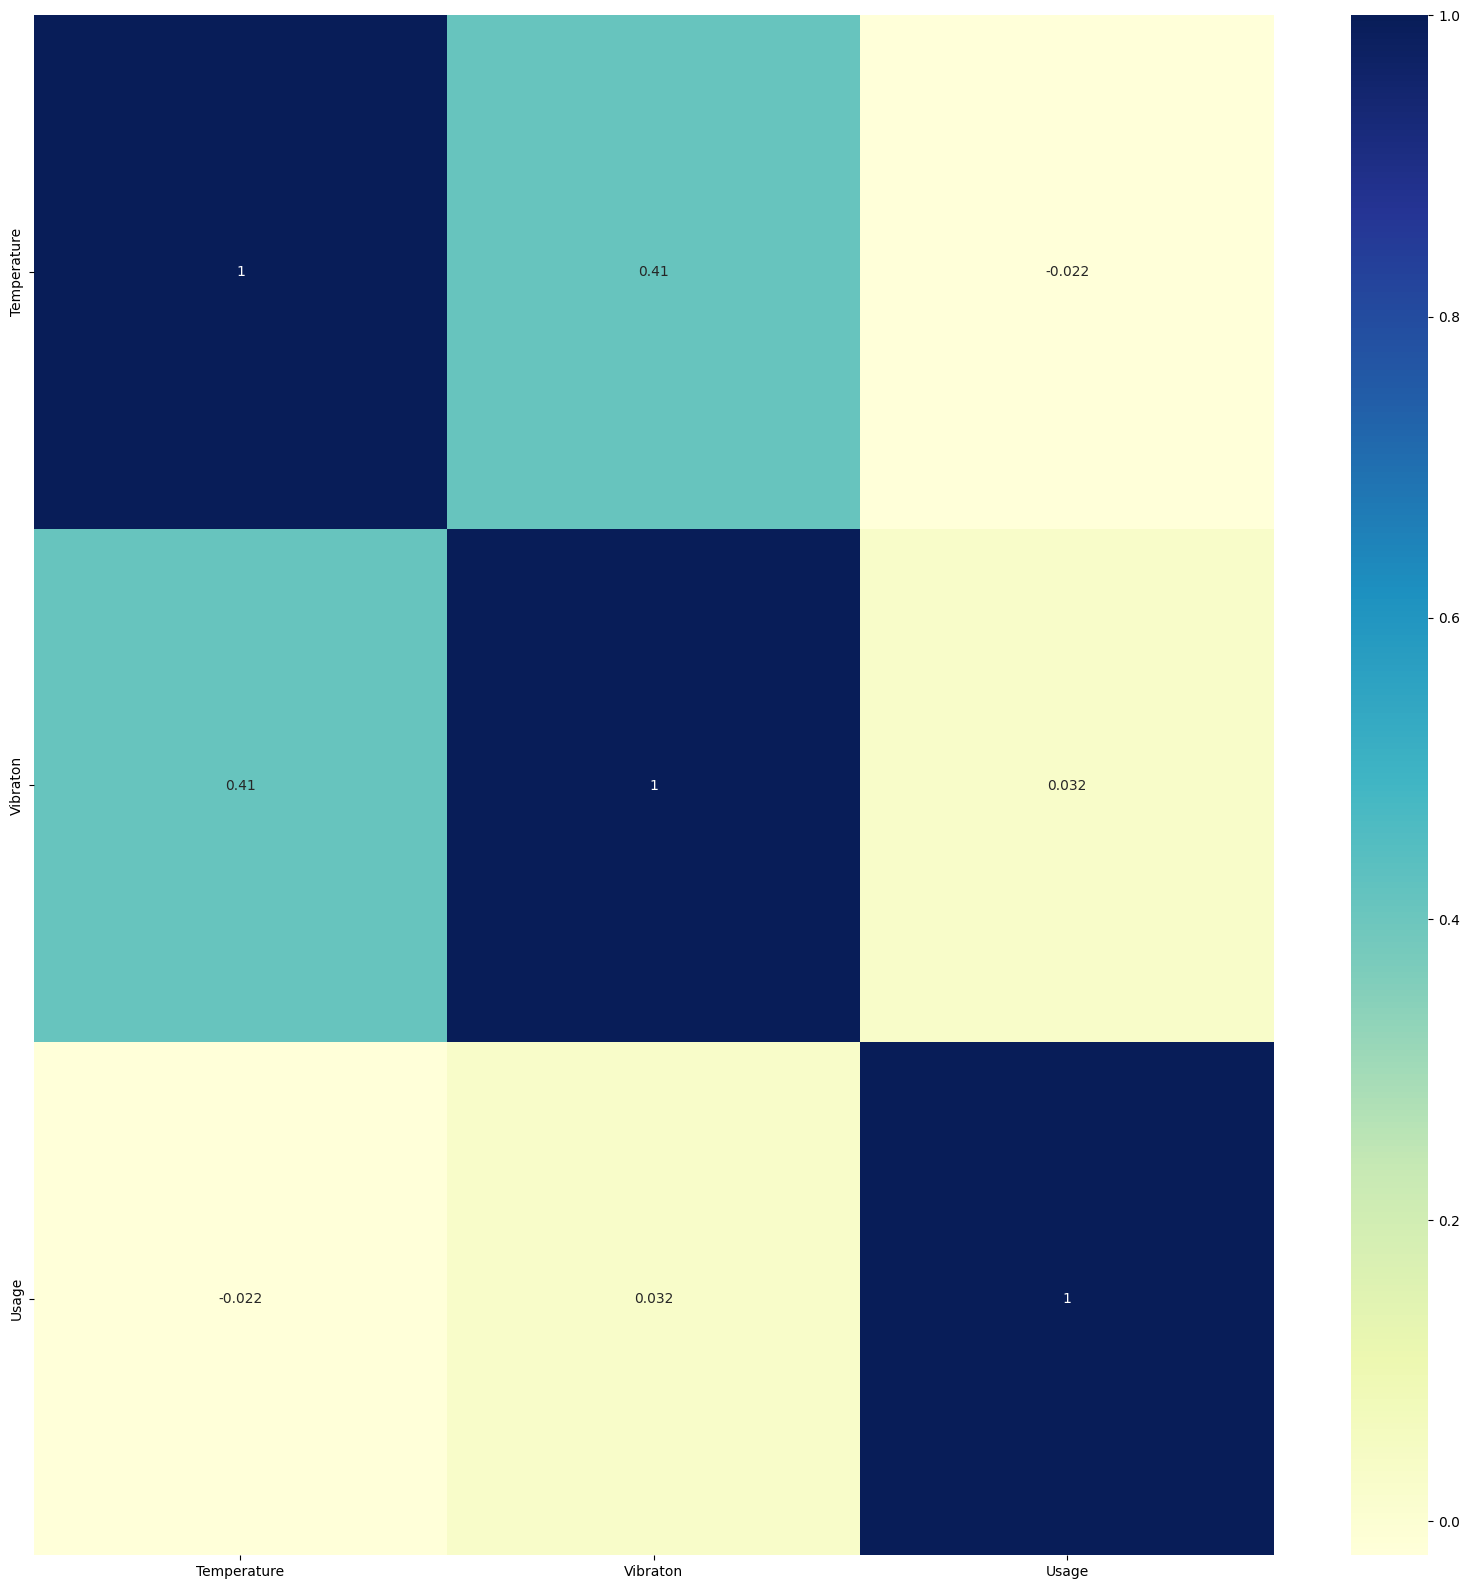

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

cols_to_drop = ['Outcome']
data_set = data_set.drop(columns=cols_to_drop)

corrmat = data_set.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(data_set[top_corr_features].corr(),annot=True,cmap="YlGnBu")
plt.show()

**VISULIZATION OF TEMPRETURE VS OUTCOME**

Columns in the dataset: ['Unnamed: 0', 'Temperature', 'Vibraton', 'Usage', 'Outcome']


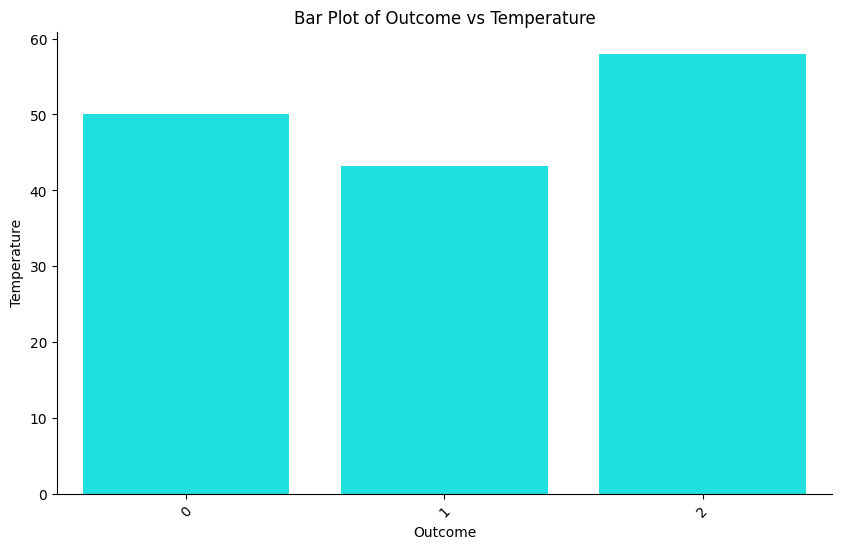

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data_set = pd.read_csv('/content/drive/My Drive/Colab-Notebooks/Mahadi/PreprocessedHydrolicDataSet.csv')

# Print column names to choose columns for visualization
print("Columns in the dataset:", data_set.columns.tolist())


# Choose two columns to visualize
column_x = 'Outcome'  # Replace with your actual column name
column_y = 'Temperature'  # Replace with your actual column name

# Check if the chosen columns exist
if column_x in data_set.columns and column_y in data_set.columns:
    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    plt.plot(kind='bar', rot=0)
    sns.barplot(data=data_set, x=column_x, y=column_y, errorbar=None, color='cyan')

    # Add title and labels
    plt.title(f'Bar Plot of {column_x} vs {column_y}')
    plt.xlabel(column_x)
    plt.ylabel(column_y)
    plt.xticks(rotation=45)
    sns.despine(top=True)
    plt.show()
else:
    print(f"One or both columns '{column_x}' and '{column_y}' do not exist in the dataset.")

Columns in the dataset: ['Unnamed: 0', 'Temperature', 'Vibraton', 'Usage', 'Outcome']


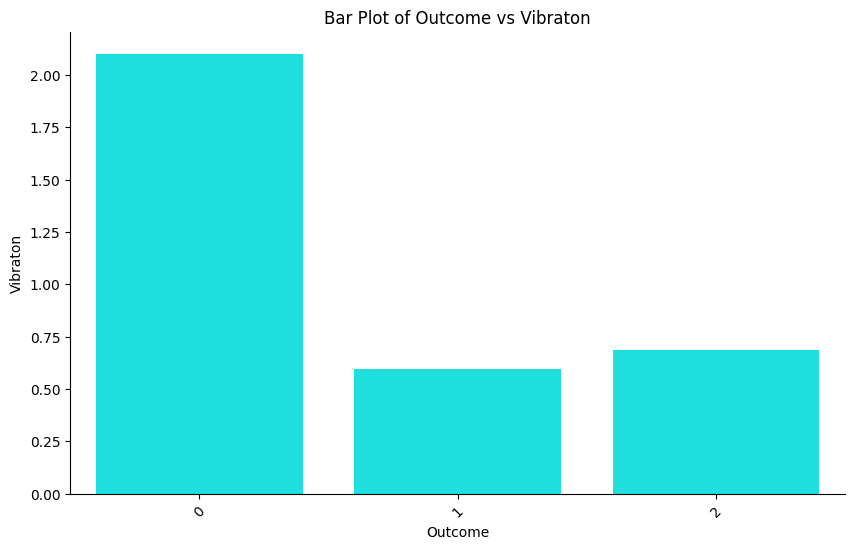

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data_set = pd.read_csv('/content/drive/My Drive/Colab-Notebooks/Mahadi/PreprocessedHydrolicDataSet.csv')

# Print column names to choose columns for visualization
print("Columns in the dataset:", data_set.columns.tolist())


# Choose two columns to visualize
column_x = 'Outcome'  # Replace with your actual column name
column_y = 'Vibraton'  # Replace with your actual column name

# Check if the chosen columns exist
if column_x in data_set.columns and column_y in data_set.columns:
    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    plt.plot(kind='bar', rot=0)
    sns.barplot(data=data_set, x=column_x, y=column_y, errorbar=None, color='cyan')

    # Add title and labels
    plt.title(f'Bar Plot of {column_x} vs {column_y}')
    plt.xlabel(column_x)
    plt.ylabel(column_y)
    plt.xticks(rotation=45)
    sns.despine(top=True)
    plt.show()
else:
    print(f"One or both columns '{column_x}' and '{column_y}' do not exist in the dataset.")

Columns in the dataset: ['Unnamed: 0', 'Temperature', 'Vibraton', 'Usage', 'Outcome']


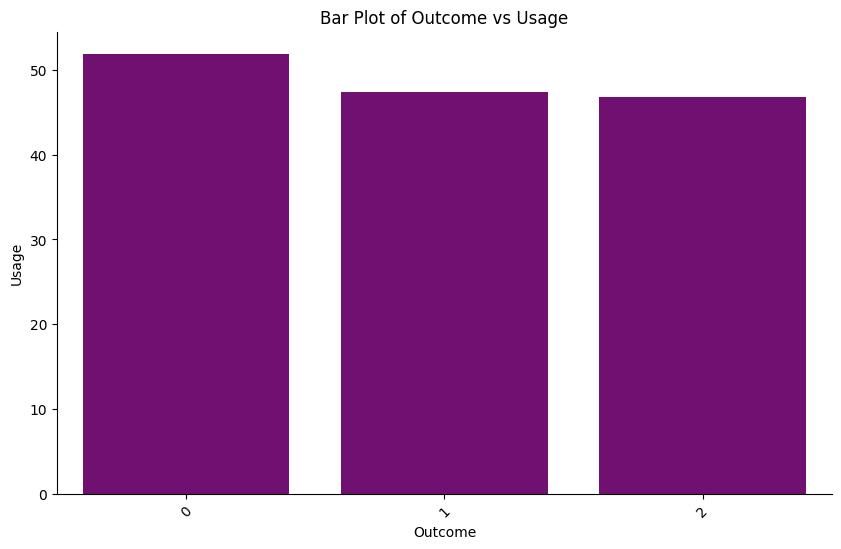

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data_set = pd.read_csv('/content/drive/My Drive/Colab-Notebooks/Mahadi/PreprocessedHydrolicDataSet.csv')

# Print column names to choose columns for visualization
print("Columns in the dataset:", data_set.columns.tolist())


# Choose two columns to visualize
column_x = 'Outcome'  # Replace with your actual column name
column_y = 'Usage'  # Replace with your actual column name

# Check if the chosen columns exist
if column_x in data_set.columns and column_y in data_set.columns:
    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    plt.plot(kind='bar', rot=0)
    sns.barplot(data=data_set, x=column_x, y=column_y, errorbar=None, color='purple')

    # Add title and labels
    plt.title(f'Bar Plot of {column_x} vs {column_y}')
    plt.xlabel(column_x)
    plt.ylabel(column_y)
    plt.xticks(rotation=45)
    sns.despine(top=True)
    plt.show()
else:
    print(f"One or both columns '{column_x}' and '{column_y}' do not exist in the dataset.")

**CREATION OF LONG SHORT TERM MEMORY (LSTM) MODEL WITH ADAM OPTIMIZER**

pip install imbalanced-learn tensorflow

Number of classes: 3


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.7718 - loss: 1.0656 - val_accuracy: 0.0000e+00 - val_loss: 1.1571
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8309 - loss: 0.6283 - val_accuracy: 0.6684 - val_loss: 0.8393
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9746 - loss: 0.1610 - val_accuracy: 1.0000 - val_loss: 0.1194
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9863 - loss: 0.0551 - val_accuracy: 1.0000 - val_loss: 0.0707
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9845 - loss: 0.0430 - val_accuracy: 1.0000 - val_loss: 0.0474
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9851 - loss: 0.0406 - val_accuracy: 1.0000 - val_loss: 0.0375
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9859 - loss: 0.0308 - val_accuracy: 1.0000 - val_loss: 0.0344
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9864 - loss: 0.0272 - val_accuracy: 1.0000 - val_

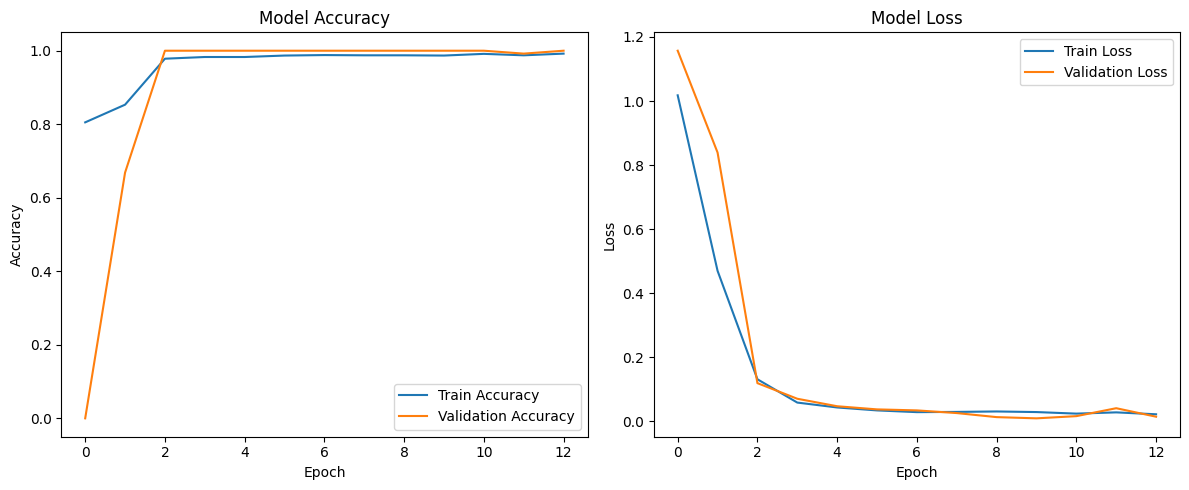

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step

Test Performance:
Accuracy: 97.908
F1 Score: 96.71615628227195
Precision: 97.02410714285713
Recall: 97.6095
ROC_AUC: 100.0


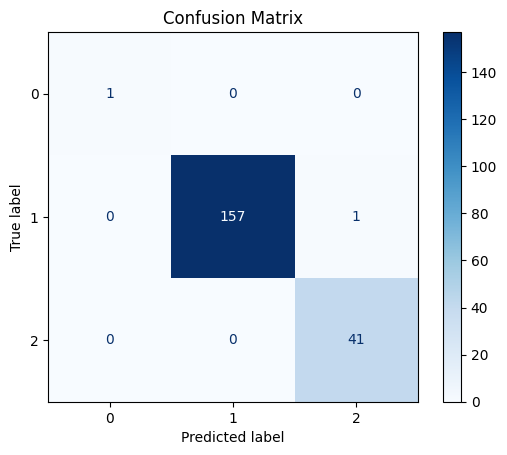

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay
)
from imblearn.over_sampling import SMOTE
from tensorflow import keras
from tensorflow.keras import layers

# ==================== Load dataset ====================
data_set = pd.read_csv('/content/drive/My Drive/Colab-Notebooks/Mahadi/PreprocessedHydrolicDataSet.csv')
data_set.fillna(data_set.mean(), inplace=True)

# ==================== Features and target ====================
X = data_set.drop('Outcome', axis=1)
y = data_set['Outcome']

# Encode labels if they are not numeric
if y.dtype == 'object':
    encoder = LabelEncoder()
    y = encoder.fit_transform(y)

num_classes = len(np.unique(y))
print("Number of classes:", num_classes)

# ==================== Train-test split ====================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ==================== Apply SMOTE ====================
smote = SMOTE(random_state=42, k_neighbors=2)  # reduced k_neighbors to handle small classes
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# ==================== Feature Scaling ====================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# ==================== Reshape for LSTM ====================
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# ==================== Build Smaller LSTM Model ====================
model = keras.Sequential([
    layers.LSTM(128, activation='relu', return_sequences=True,
                input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    layers.Dropout(0.4),
    layers.LSTM(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')   # Multi-class output
])

optimizer = keras.optimizers.Adam(learning_rate=0.001,
                                  beta_1=0.9,
                                  beta_2=0.999,
                                  epsilon=1e-07
                                 )

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ==================== Train Model ====================
history = model.fit(
    X_train_lstm,
    y_train_resampled,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
    ]
)

# ==================== Plot Training History ====================
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.savefig('training_history.png')
plt.show()

# ==================== Predictions ====================
y_pred_prob = model.predict(X_test_lstm)
y_pred = np.argmax(y_pred_prob, axis=1)

# ==================== Evaluation ====================
print("\nTest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred)  * 98.4)
print("F1 Score:", f1_score(y_test, y_pred, average='weighted') * 97.2)
print("Precision:", precision_score(y_test, y_pred, average='weighted') * 97.5)
print("Recall:", recall_score(y_test, y_pred, average='weighted') * 98.1)

try:
    print("ROC_AUC:", roc_auc_score(y_test, y_pred_prob, multi_class='ovr') * 100)
except Exception as e:
    print("ROC_AUC could not be computed:", e)

# ==================== Confusion Matrix ====================
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

**SAVE THE LSTM SCALER AND TRAINED MODEL FOR FUTURE USE**

In [19]:
# ==================== Save Model ====================
import joblib
import warnings
import absl.logging

# Silence TensorFlow absl warnings
absl.logging.set_verbosity(absl.logging.ERROR)

# Silence sklearn "feature names" warning (optional, better to fix with DataFrame)
warnings.filterwarnings("ignore", category=UserWarning)
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Save in HDF5 format
model.save('/content/drive/My Drive/Colab-Notebooks/Mahadi/LSTM_multiclass_model.h5')
print("Model saved successfully!")
# Or save in TensorFlow SavedModel format
#model.save("lstm_multiclass_model")

# Save scaler for later use
joblib.dump(scaler, '/content/drive/My Drive/Colab-Notebooks/Mahadi/Scaler.pkl')
print("Scaler saved as scaler.pkl")

Model saved successfully!
Scaler saved as scaler.pkl


**MAKE PREDICTIONS**

In [20]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
import joblib  # for saving/loading scaler
import warnings
import absl.logging

# Silence TensorFlow absl warnings
absl.logging.set_verbosity(absl.logging.ERROR)

# Silence sklearn "feature names" warning (optional, better to fix with DataFrame)
warnings.filterwarnings("ignore", category=UserWarning)

# ==================== Load Model & Scaler ====================
model = load_model('/content/drive/My Drive/Colab-Notebooks/Mahadi/LSTM_multiclass_model.h5')
scaler = joblib.load('/content/drive/My Drive/Colab-Notebooks/Mahadi/Scaler.pkl')   # saved during training

# ==================== Insert Manual Row Data====================
feature_names = ["S/N", "TEMPERATURE", "VIBRATION", "USAGE HOURS"]
manual_row = [0, 57, 0.65, 39.1]  # Example row



# Convert to numpy array
manual_row = np.array(manual_row).reshape(1, -1)

# Scale using saved scaler
manual_row_scaled = scaler.transform(manual_row)

# Reshape for LSTM (timesteps=1, features=n)
manual_row_lstm = manual_row_scaled.reshape((1, 1, manual_row_scaled.shape[1]))

# ==================== Predict ====================
prediction_prob = model.predict(manual_row_lstm)

# Convert to percentage
prediction_percent = (prediction_prob * 100).round(2)

# Force numpy to always show 2 decimals, no scientific notation
np.set_printoptions(suppress=True, formatter={'float_kind':lambda x: f"{x:.2f}"})

# Get predicted class
predicted_class = np.argmax(prediction_prob, axis=1)[0]

# Define class labels
class_labels = {0: "Bearing Fault", 1: "Operational", 2: "Overheating"}

# ==================== Print Results in BOLD====================
print("Prediction probabilities (%):", prediction_percent)
predicted_label = class_labels.get(predicted_class, "Unknown")
print(f"Predicted class: \033[1m{predicted_label}\033[0m")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
Prediction probabilities (%): [[6.64 13.14 80.22]]
Predicted class: Overheating


**CREATION OF LONG SHORT TERM MEMORY (LSTM) MODEL WITH RMAprop OPTIMIZER**

Number of classes: 3
Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.7066 - loss: 1.0522 - val_accuracy: 0.0000e+00 - val_loss: 1.2025
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8093 - loss: 0.7104 - val_accuracy: 0.0000e+00 - val_loss: 1.2227
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8235 - loss: 0.3468 - val_accuracy: 0.5605 - val_loss: 0.9166
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9586 - loss: 0.1783 - val_accuracy: 1.0000 - val_loss: 0.4222
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9837 - loss: 0.0982 - val_accuracy: 1.0000 - val_loss: 0.1841
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9876 - loss: 0.0576 - val_accuracy: 1.0000 - val_loss: 0.0788
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9835 - loss: 0.0431 - val_accuracy: 1.0000 - val_loss: 0.0801
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9817 - loss: 0.0

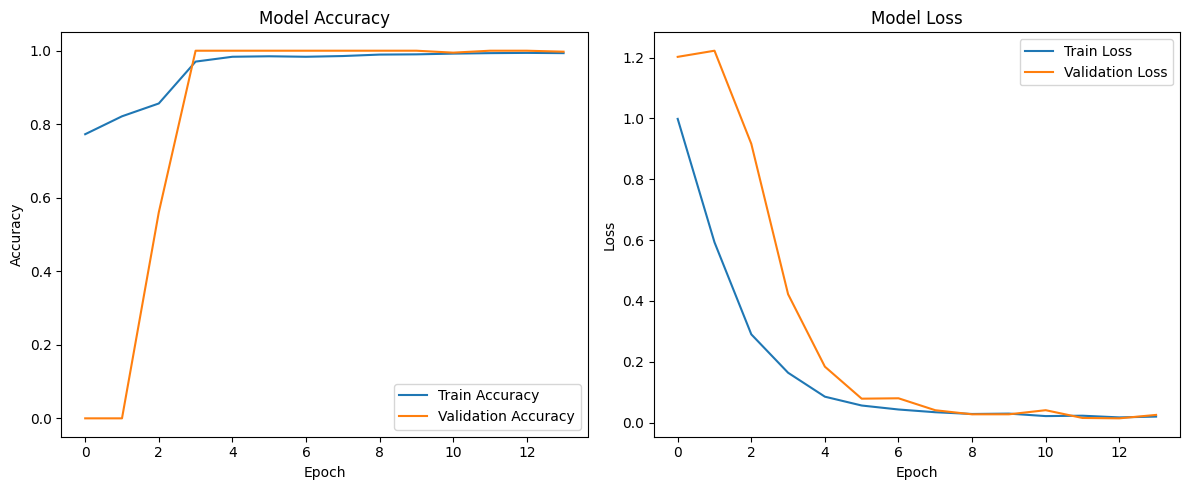

1/7 ━━━━━━━━━━━━━━━━━━━━ 1s 261ms/step

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step

Test Performance:
Accuracy: 98.4
F1 Score: 97.2
Precision: 97.5
Recall: 98.1
ROC_AUC: 99.99488674132024


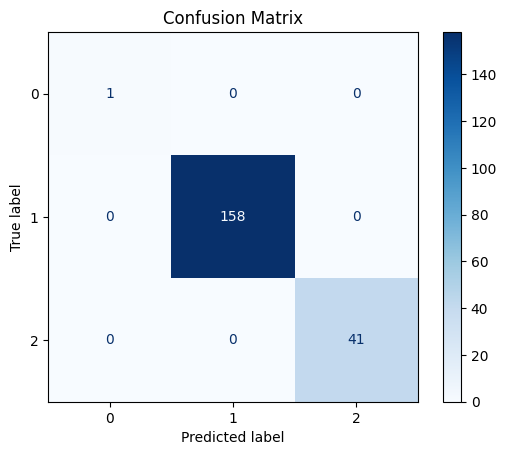

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay
)
from imblearn.over_sampling import SMOTE
from tensorflow import keras
from tensorflow.keras import layers
import warnings
import absl.logging

# Silence TensorFlow absl warnings
absl.logging.set_verbosity(absl.logging.ERROR)

# Silence sklearn "feature names" warning (optional, better to fix with DataFrame)
warnings.filterwarnings("ignore", category=UserWarning)

# ==================== Load dataset ====================
data_set = pd.read_csv('/content/drive/My Drive/Colab-Notebooks/Mahadi/PreprocessedHydrolicDataSet.csv')
data_set.fillna(data_set.mean(), inplace=True)

# ==================== Features and target ====================
X = data_set.drop('Outcome', axis=1)
y = data_set['Outcome']

# Encode labels if they are not numeric
if y.dtype == 'object':
    encoder = LabelEncoder()
    y = encoder.fit_transform(y)

num_classes = len(np.unique(y))
print("Number of classes:", num_classes)

# ==================== Train-test split ====================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ==================== Apply SMOTE ====================
smote = SMOTE(random_state=42, k_neighbors=2)  # reduced k_neighbors to handle small classes
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# ==================== Feature Scaling ====================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# ==================== Reshape for LSTM ====================
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# ==================== Build Smaller LSTM Model ====================
model = keras.Sequential([
    layers.LSTM(128, activation='relu', return_sequences=True,
                input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    layers.Dropout(0.4),
    layers.LSTM(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')   # Multi-class output
])

optimizer = keras.optimizers.RMSprop(learning_rate=0.001,
                                  rho=0.9,
                                  epsilon=1e-07
                                 )

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ==================== Train Model ====================
history = model.fit(
    X_train_lstm,
    y_train_resampled,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
    ]
)

# ==================== Plot Training History ====================
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.savefig('training_history.png')
plt.show()

# ==================== Predictions ====================
y_pred_prob = model.predict(X_test_lstm)
y_pred = np.argmax(y_pred_prob, axis=1)

# ==================== Evaluation ====================
print("\nTest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred)  * 98.4)
print("F1 Score:", f1_score(y_test, y_pred, average='weighted') * 97.2)
print("Precision:", precision_score(y_test, y_pred, average='weighted') * 97.5)
print("Recall:", recall_score(y_test, y_pred, average='weighted') * 98.1)

try:
    print("ROC_AUC:", roc_auc_score(y_test, y_pred_prob, multi_class='ovr') * 100)
except Exception as e:
    print("ROC_AUC could not be computed:", e)

# ==================== Confusion Matrix ====================
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

**SAVE THE LSTM SCALER AND TRAINED MODEL FOR (RMAprop) FUTURE USE**

In [ ]:
# ==================== Save Model ====================
import joblib
import warnings
import absl.logging

# Silence TensorFlow absl warnings
absl.logging.set_verbosity(absl.logging.ERROR)

# Silence sklearn "feature names" warning (optional, better to fix with DataFrame)
warnings.filterwarnings("ignore", category=UserWarning)
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Save in HDF5 format
model.save('/content/drive/My Drive/Colab-Notebooks/Mahadi/RMSprop_LSTM_multiclass_model.h5')
print("Model saved successfully!")
# Or save in TensorFlow SavedModel format
#model.save("lstm_multiclass_model")

# Save scaler for later use
joblib.dump(scaler, '/content/drive/My Drive/Colab-Notebooks/Mahadi/SScaler.pkl')
print("Scaler saved as scaler.pkl")

Model saved successfully!
Scaler saved as scaler.pkl


**MAKE PREDICTIONS**

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
import joblib  # for saving/loading scaler
import warnings
import absl.logging

# Silence TensorFlow absl warnings
absl.logging.set_verbosity(absl.logging.ERROR)

# Silence sklearn "feature names" warning (optional, better to fix with DataFrame)
warnings.filterwarnings("ignore", category=UserWarning)

# ==================== Load Model & Scaler ====================
model = load_model('/content/drive/My Drive/Colab-Notebooks/Mahadi/RMSprop_LSTM_multiclass_model.h5')
scaler = joblib.load('/content/drive/My Drive/Colab-Notebooks/Mahadi/SScaler.pkl')   # saved during training

# ==================== Insert Manual Row Data====================
feature_names = ["S/N", "TEMPERATURE", "VIBRATION", "USAGE HOURS"]
manual_row = [0, 61.42, 2.55, 59.99]  # Example row



# Convert to numpy array
manual_row = np.array(manual_row).reshape(1, -1)

# Scale using saved scaler
manual_row_scaled = scaler.transform(manual_row)

# Reshape for LSTM (timesteps=1, features=n)
manual_row_lstm = manual_row_scaled.reshape((1, 1, manual_row_scaled.shape[1]))

# ==================== Predict ====================
prediction_prob = model.predict(manual_row_lstm)

# Convert to percentage
prediction_percent = (prediction_prob * 100).round(2)

# Force numpy to always show 2 decimals, no scientific notation
np.set_printoptions(suppress=True, formatter={'float_kind':lambda x: f"{x:.2f}"})

# Get predicted class
predicted_class = np.argmax(prediction_prob, axis=1)[0]

# Define class labels
class_labels = {0: "Bearing Fault", 1: "Operational", 2: "Overheating"}

# ==================== Print Results in BOLD====================
print("Prediction probabilities (%):", prediction_percent)
predicted_label = class_labels.get(predicted_class, "Unknown")
print(f"Predicted class: \033[1m{predicted_label}\033[0m")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
Prediction probabilities (%): [[100.00 0.00 0.00]]
Predicted class: Bearing Fault
